In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
shuff=1  ## Shuffling data
# shuff=0  ## Not Shuffling data 

In [3]:
scaling_sw=1  ## scaling data
# scaling_sw=0  ## not scaling 

In [4]:
### loc_info='No_Loc_info' ## Excluding location information
loc_info='Includ_Loc_info'; ## All features including location information

##################
### Resampling time average  
# tempo_res='1min' 
tempo_res='1S'

In [5]:
### import data
if tempo_res=='1min':
    df = pd.read_pickle('Data/Cinderella_Weatheres_1min_data.pkl')
if tempo_res=='1S':
    df = pd.read_pickle('Data/Cinderella_Weatheres_1S_data.pkl')

df.shape

(243688, 70)

In [6]:
import os

# Get current working directory
current_dir = os.getcwd()

print("Current directory:", current_dir)

# Output_folder='Cinderella_Classification_v2'
# Output_folder='Cinderella_Classification_v3'
Output_folder='Cinderella_Classification_v4'




Current directory: C:\Users\Mhdella\iHelm\Cinderella_Clustering


In [7]:
## Create the output folder
folder_path = r''+Output_folder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

### Postprocessing data

In [8]:
# st=stop
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,wavedirect,Temp_2m,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,151.301651,293.959625,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,151.303497,293.959625,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,151.305344,293.959625,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,151.307190,293.959625,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,151.309036,293.959625,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,206.433884,282.306488,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,206.434097,282.306549,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,206.434296,282.306580,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0


#### Modify Course and wind direction measurments

In [9]:
# df.columns

In [10]:
df['courseOverGroundTrue']= df.course_over_ground_true
df['windDirectionTrue']= df.wind_direction_true

df[['courseOverGroundTrue','windDirectionTrue']].describe()

,courseOverGroundTrue,windDirectionTrue
count,243688.000000,243688.000000
mean,178.397720,176.315674
std,91.753745,96.435665
min,0.048700,0.000000
25%,99.722948,101.645594
50%,171.795700,174.893483
75%,270.592938,261.916912
max,359.892000,359.892000


In [11]:
dforig=df
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry,courseOverGroundTrue,windDirectionTrue
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0,171.795700,160.576217
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,156.996200
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,153.420925
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,149.662333
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,151.495800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0,127.806862,210.930100
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0,173.826817,206.375550
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0,169.127583,207.490900


In [12]:
# st=stop

### Postprocessing data

In [13]:
df=dforig
df.shape

(243688, 72)

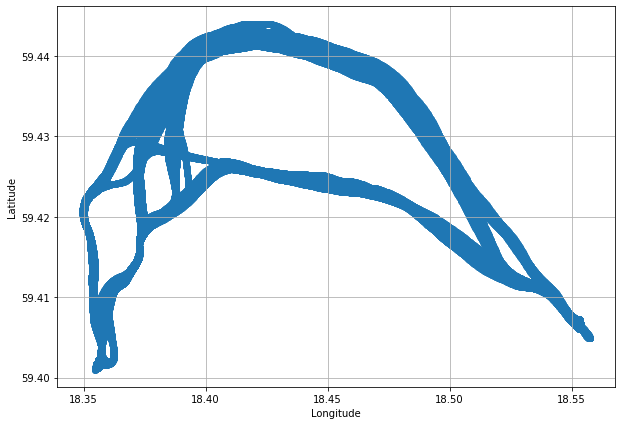

In [14]:
# Create a scatter plot of latitude and longitude to visualize the ferry's path
fig = plt.figure(figsize=(10,7))
plt.scatter(dforig['longitude'], dforig['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig(Output_folder+'/Scatter_dforig_lat_lon_paths_'+tempo_res+'.png', dpi=500)  

plt.show()

In [15]:
# st=stop

In [16]:
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South                 104308
North_Middle_Upper     66628
North_West_Upper       26867
North_East_Lower       26311
North_Middle_Lower     11407
South_West              4408
North_West_Lower        3759
Name: direction, dtype: int64

### Merging and changing names of some paths (minority paths with slight difference)

In [17]:
df['direction'] = df['direction'].replace('North_West_Upper', 'North_West')
df['direction'] = df['direction'].replace('North_West_Lower', 'North_West')

df['direction'] = df['direction'].replace('North_East_Lower', 'North_East')
df['direction'] = df['direction'].replace('North_Middle_Upper', 'North_Middle')
df['direction'] = df['direction'].replace('North_Middle_Lower', 'North_Middle')

# Check the new unique values
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64

In [18]:
dforig1=df
dforig2=df
dforig3=df

In [19]:
# df = df[['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue',
#               'distanceFromDock', 'distanceToNextDock', 'distanceToPreviousDock', 
#               'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg', 'EngineFuelRate',
#               'windSpeedOverGround', 'windDirectionTrue',  'windSpeed','windDirection', 
#               'waveheight', 'wavedirect','currentSpeed', 'currentDirection',
#               'windSpeed_sg', 'windDirection_sg', 'Temp_2m', 'Temp_surf',
#        'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
#          'iceCover', 'swellHeight', 'secondarySwellHeight','waterTemperature',
#          'direction']]


df['pathSelection']=df.direction

In [20]:
df.shape

(243688, 73)

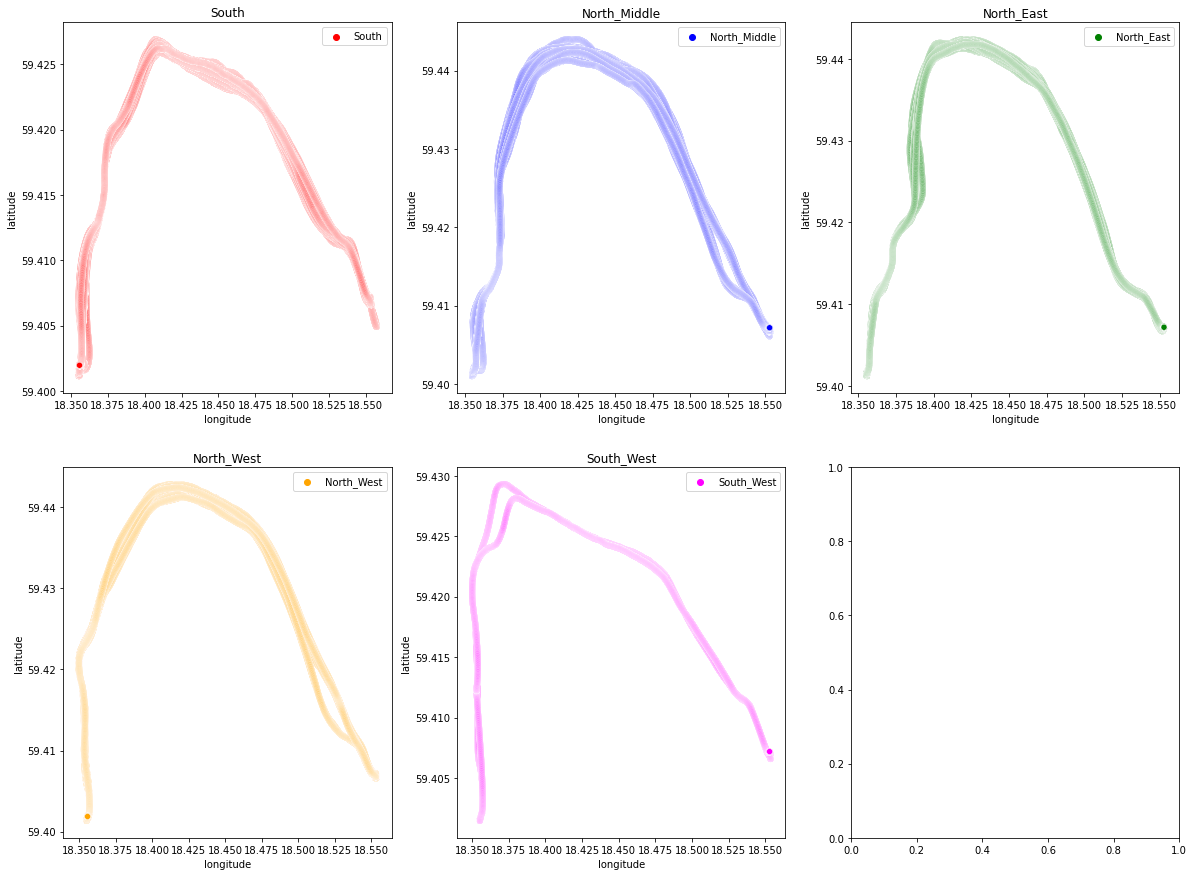

In [21]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for both paths
import matplotlib.ticker as ticker
fig_scatter_actual_paths, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='South'], ax=axes[0,0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_Middle'], ax=axes[0,1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_East'], ax=axes[0,2],  palette=['green'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_West'], ax=axes[1,0],  palette=['orange'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='South_West'], ax=axes[1,1],  palette=['magenta'])

# # Set number format for axis ticks
# for ax in axes:
#     ax.ticklabel_format(useOffset=False, style='plain')


axes[0,0].set_title('South')
axes[0,1].set_title('North_Middle')
axes[0,2].set_title('North_East')
axes[1,0].set_title('North_West')
axes[1,1].set_title('South_West')

axes[0,0].legend(title='')
axes[0,1].legend(title='')
axes[0,2].legend(title='')
axes[1,0].legend(title='')
axes[1,1].legend(title='')

fig_scatter_actual_paths.savefig(Output_folder+'/ScatterPlot_acutal_5paths_'+tempo_res+'.png')  

plt.show()

In [22]:
# dforig[(dforig.RT_id==1308) & (dforig.Direct_RT==0)].longitude
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

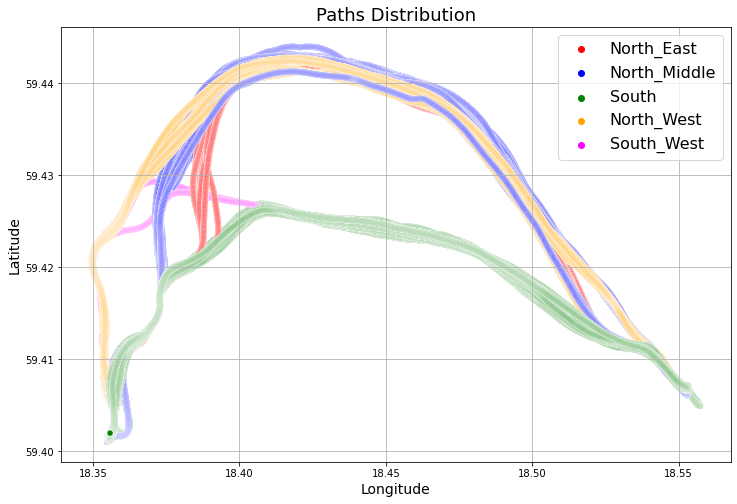

In [23]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for all path classes in a single plot
fig = plt.figure(figsize=(12, 8))

# Use the 'hue' parameter to specify the path selection class
sns.scatterplot(x='longitude', y='latitude', hue='direction', 
                data=df, legend='full', palette=['red', 'blue', 'green', 'orange','magenta'])


# Set title
plt.title('Paths Distribution', fontsize=18)

plt.legend(fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.grid()

plt.savefig(Output_folder+'/ScatterPlot_Colorful_paths_'+tempo_res+'.png')  

plt.show()

In [24]:
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

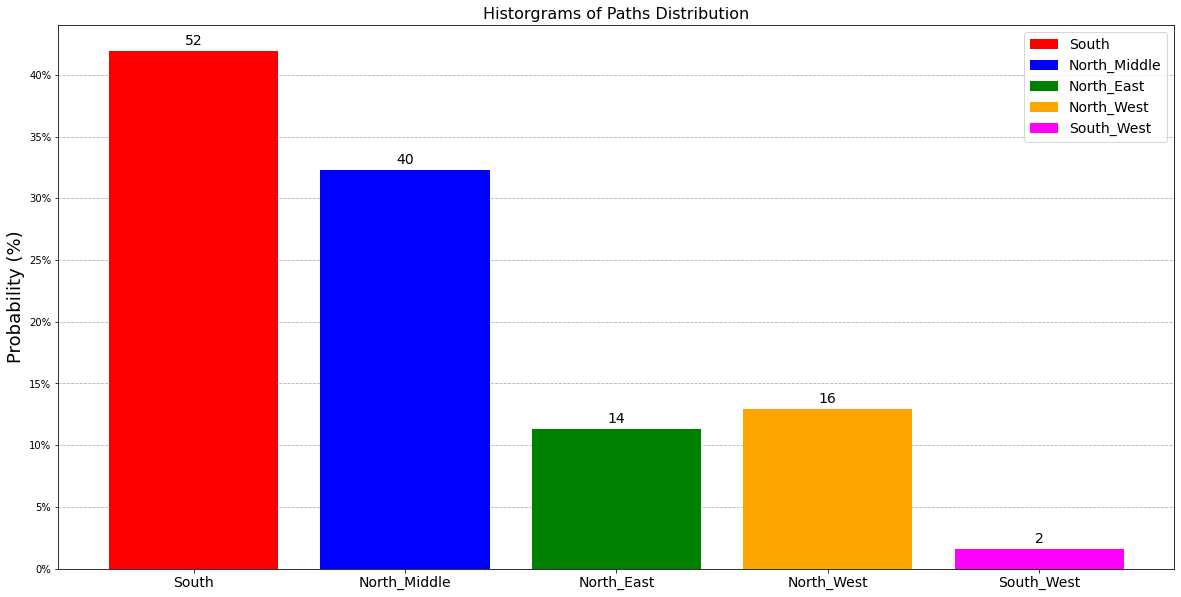

In [25]:
# train_df.groupby(['RT_id']).mean()
rt_class=[]
rt_class=df.groupby('RT_id')['direction'].first()

# Calculate the probability distribution of each path class
prob_dist = rt_class.value_counts(normalize=True)
counts = rt_class.value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)


# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']

labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.005, str(counts[labels[i]]), ha='center', fontsize=14)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)


# Set the title and legend
ax.set_title('Historgrams of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
plt.ylabel('Probability (%)',fontsize=18)

ax.legend(fontsize=14)
ax.grid(axis='y', linestyle='--', zorder=0)


plt.savefig(Output_folder+'/Hist_5paths.png', dpi=500)  

plt.show()


In [26]:
df.columns

Index(['engine_rpm', 'engine_fuel_rate', 'latitude', 'longitude',
       'latitude_can0', 'longitude_can0', 'heading_magnetic', 'heading_true',
       'course_over_ground_true', 'speed_over_ground',
       'wind_speed_over_ground', 'wind_direction_true', 'wind_speed_apparent',
       'wind_direction_apparent', 'rate_of_turn', 'magnetic_variation',
       'pitch', 'roll', 'temperature', 'atmospheric_pressure',
       'engine_trip_fuel', 'satellites', 'delta_distance', 'delta_timestamp',
       'fuel_per_step', 'fuel_per_step_engine_trip', 'acceleration',
       'wind_speed_apparent_calculated', 'wind_direction_apparent_calculated',
       'course_heading_diff', 'distance_from_dock', 'leg_id',
       'distance_to_next_dock', 'distance_to_previous_dock', 'segment_id',
       'accum_fuel_leg', 'accum_dist_leg', 'accum_time_leg', 'month', 'day',
       'hour', 'RT_id', 'sailing_state', 'closest_dock', 'segment_state',
       'leg', 'leg_uuid', 'segment_uuid', 'direction', 'windSpeed_sg',
  

In [27]:
df.index.value_counts()
df.groupby('date')['direction']

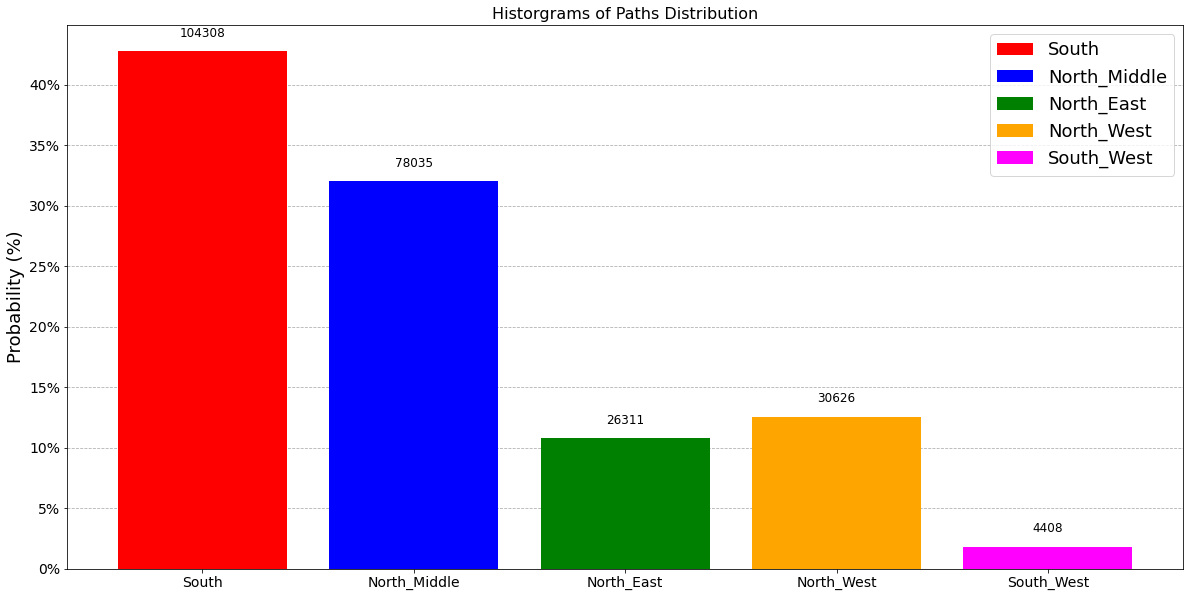

In [28]:
import matplotlib.pyplot as plt

# Calculate the probability distribution of each path class
prob_dist = df['direction'].value_counts(normalize=True)
counts = df['direction'].value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)

# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']
labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.012, str(counts[labels[i]]), ha='center', fontsize=12)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

# Set the title and legend
ax.set_title('Historgrams of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
plt.ylabel('Probability (%)',fontsize=18)

ax.legend(fontsize=18)
ax.grid(axis='y', linestyle='--', zorder=0)



plt.savefig(Output_folder+'/Hist_points_5paths.png', dpi=500)  

plt.show()


In [29]:
# st=stop

In [30]:
df=dforig2
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64

In [31]:
df.columns

Index(['engine_rpm', 'engine_fuel_rate', 'latitude', 'longitude',
       'latitude_can0', 'longitude_can0', 'heading_magnetic', 'heading_true',
       'course_over_ground_true', 'speed_over_ground',
       'wind_speed_over_ground', 'wind_direction_true', 'wind_speed_apparent',
       'wind_direction_apparent', 'rate_of_turn', 'magnetic_variation',
       'pitch', 'roll', 'temperature', 'atmospheric_pressure',
       'engine_trip_fuel', 'satellites', 'delta_distance', 'delta_timestamp',
       'fuel_per_step', 'fuel_per_step_engine_trip', 'acceleration',
       'wind_speed_apparent_calculated', 'wind_direction_apparent_calculated',
       'course_heading_diff', 'distance_from_dock', 'leg_id',
       'distance_to_next_dock', 'distance_to_previous_dock', 'segment_id',
       'accum_fuel_leg', 'accum_dist_leg', 'accum_time_leg', 'month', 'day',
       'hour', 'RT_id', 'sailing_state', 'closest_dock', 'segment_state',
       'leg', 'leg_uuid', 'segment_uuid', 'direction', 'windSpeed_sg',
  

In [32]:
#### Change the names of some columns

feature_new = ['speedOverGround', 'courseOverGroundTrue','rateOfTurn',
               'distanceToPreviousDock', 'distanceToNextDock', 'distanceFromDock', 'accumDistLeg', 
                'windSpeed_Onb', 'windDirection_Onb',
                 'waveHeight', 'waveDirection']

features_old = ['speed_over_ground', 'course_over_ground_true', 'rate_of_turn',
                 'distance_to_previous_dock', 'distance_to_next_dock', 'distance_from_dock', 'accum_dist_leg', 
                 'wind_speed_over_ground', 'wind_direction_true',
                 'waveheight', 'wavedirect']

# df[feature_new]=df[features_old]

# create a dictionary of old and new feature names using a dictionary comprehension
feature_map = {old_name: new_name for old_name, new_name in zip(features_old, feature_new)}

# use the rename() method to change the column names based on the feature_map dictionary
df = df.rename(columns=feature_map)
df = df.loc[:,~df.columns.duplicated()]  ### drop duplicated columns
df.columns

Index(['engine_rpm', 'engine_fuel_rate', 'latitude', 'longitude',
       'latitude_can0', 'longitude_can0', 'heading_magnetic', 'heading_true',
       'courseOverGroundTrue', 'speedOverGround', 'windSpeed_Onb',
       'windDirection_Onb', 'wind_speed_apparent', 'wind_direction_apparent',
       'rateOfTurn', 'magnetic_variation', 'pitch', 'roll', 'temperature',
       'atmospheric_pressure', 'engine_trip_fuel', 'satellites',
       'delta_distance', 'delta_timestamp', 'fuel_per_step',
       'fuel_per_step_engine_trip', 'acceleration',
       'wind_speed_apparent_calculated', 'wind_direction_apparent_calculated',
       'course_heading_diff', 'distanceFromDock', 'leg_id',
       'distanceToNextDock', 'distanceToPreviousDock', 'segment_id',
       'accum_fuel_leg', 'accumDistLeg', 'accum_time_leg', 'month', 'day',
       'hour', 'RT_id', 'sailing_state', 'closest_dock', 'segment_state',
       'leg', 'leg_uuid', 'segment_uuid', 'direction', 'windSpeed_sg',
       'windDirection_sg', 'cu

### Merging and changing names of some paths (minority paths with slight difference)

In [33]:
df['Path_7classes']=df['direction'] 

In [34]:
df['direction'] = df['direction'].replace('North_West_Upper', 'North_West')
df['direction'] = df['direction'].replace('North_West_Lower', 'North_West')

df['direction'] = df['direction'].replace('North_East_Lower', 'North_East')
df['direction'] = df['direction'].replace('North_Middle_Upper', 'North_Middle')
df['direction'] = df['direction'].replace('North_Middle_Lower', 'North_Middle')


df['Path_class']=df['direction'] 

# Check the new unique values
df.Path_class.unique()
print(df['Path_class'].value_counts().sum())
df['Path_class'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: Path_class, dtype: int64

In [35]:
st=stop

NameError: name 'stop' is not defined

### Paths Classification

In [36]:
df.leg
df_vxsd=df[df.leg=='vaxholm-sodra']
df_sdvx=df[df.leg=='sodra-vaxholm']

In [37]:
df=df_vxsd.copy(); vxsd=1
# df=df_sdvx.copy(); vxsd=0
df.shape

(108963, 74)

In [38]:
df.Path_class.unique()

array(['North_East', 'South', 'North_Middle', 'South_West', 'North_West'],
      dtype=object)

In [39]:
print(df[df.Path_class=='South_West'].RT_id.unique())
print(df[df.Path_class=='North_West'].RT_id.unique())
print(df[df.Path_class=='North_East'].RT_id.unique())

[75.]
[103. 105.]
[ 0.  2.  4. 18. 59. 63. 67. 70. 84. 86. 90. 92. 96. 99.]


In [108]:
target = 'Path_class'
# Load data into a pandas dataframe

# features=['day', 'Press_surf', 'swellHeight', 'waveHeight', 'waterTemperature', 'courseOverGroundTrue', 'Temp_2m',
#  'windDirection_sg', 'Temp_surf', 'hour', 'windDirection_cpr', 'month', 'windSpeed_sg', 'windSpeed_cpr',
#  'currentSpeed', 'Precip', 'secondarySwellHeight', 'latitude', 'longitude', 'speedOverGround']; feats='Best_Shaps_incld_long'

features=['day', 'Press_surf', 'swellHeight', 'waveHeight', 'waterTemperature', 'courseOverGroundTrue', 'Temp_2m',
 'windDirection_sg', 'Temp_surf', 'hour', 'windDirection_cpr', 'month', 'windSpeed_sg', 'windSpeed_cpr',
 'currentSpeed', 'Precip', 'secondarySwellHeight', 'latitude', 'speedOverGround']; feats='Best_Shaps'


# features=['day', 'Press_surf', 'swellHeight', 'waveHeight', 'waterTemperature', 'Temp_2m',
#  'windDirection_sg', 'Temp_surf', 'hour', 'windDirection_cpr', 'month', 'windSpeed_sg', 'windSpeed_cpr',
#  'currentSpeed', 'Precip', 'secondarySwellHeight', 'latitude', 'speedOverGround']; feats='Best_Shaps_noCOG'

# features=['day', 'Press_surf', 'swellHeight', 'waveHeight', 'waterTemperature', 'courseOverGroundTrue', 'Temp_2m',
#  'windDirection_sg', 'Temp_surf', 'hour', 'windDirection_cpr', 'month', 'windSpeed_sg', 'windSpeed_cpr',
#  'currentSpeed', 'Precip', 'secondarySwellHeight', 'speedOverGround']; feats='Best_Shaps_noLat_lon'

# features=['Press_surf', 'swellHeight', 'waveHeight', 'waterTemperature', 'courseOverGroundTrue', 'Temp_2m',
#  'windDirection_sg', 'Temp_surf', 'windDirection_cpr', 'windSpeed_sg', 'windSpeed_cpr',
#  'currentSpeed', 'Precip', 'secondarySwellHeight', 'speedOverGround']; feats='Best_Shaps_noTime_noLat_lon'

features=['Press_surf', 'swellHeight', 'waveHeight', 'waterTemperature', 'Temp_2m',
 'windDirection_sg', 'Temp_surf', 'windDirection_cpr', 'windSpeed_sg', 'windSpeed_cpr',
 'currentSpeed', 'Precip', 'secondarySwellHeight', 'speedOverGround']; feats='Best_Shaps_noCog_noTime_noLat_lon'

# features=['latitude', 'longitude', 'hour', 'speedOverGround', 'courseOverGroundTrue',
#             'windSpeed_Onb', 'windDirection_Onb', 'distanceFromDock', 'distanceToNextDock',
#            'waterTemperature', 'waveHeight', 'waveDirection']; feats='ManyFeats'

# features=['latitude', 'longitude', 'hour', 'speedOverGround', 'courseOverGroundTrue',
#     'distanceFromDock', 'distanceToNextDock']; feats='latlon_hr_sog_cog_dist'

# features=['latitude', 'longitude', 'hour', 'speedOverGround', 'courseOverGroundTrue']; feats='latlon_hr_sog_cog'

# features=['latitude', 'longitude', 'hour', 'courseOverGroundTrue']; feats='latlon_hr_cog'

# features=['latitude', 'longitude', 'hour']; feats='latlon_hr'

# features=['latitude', 'longitude']; feats='lat_lon'


# plt.savefig(Output_folder+'/Plot_PCA_5paths_'+tempo_res+'_'+pca_feats+'.png', dpi=500)  


In [109]:
selected_columns = ['RT_id'] +features + [target] 

# df[selected_columns]


In [110]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# # Perform stratified train-test split
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, stratify=df[target],
#                                                     shuffle=True)

# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42,
#                                                     shuffle=False)


# Identify the minority path classes
minority_paths = df['Path_class'].value_counts().tail(1).index.tolist()

# Split the dataframe for each minority class
train_dfs = []
test_dfs = []
for path in minority_paths:
    path_df = df[df['Path_class'] == path]
    
    if shuff==0:
        train_df, test_df = train_test_split(path_df, test_size=0.2, random_state=42, shuffle=False)
    if shuff==1:
        train_df, test_df = train_test_split(path_df, test_size=0.2, random_state=42)
        
    train_dfs.append(train_df)
    test_dfs.append(test_df)
train_dfmn = pd.concat(train_dfs)
test_dfmn = pd.concat(test_dfs)
#############

# Identify the majority path classes
majority_paths = df['Path_class'].value_counts().head(4).index.tolist()

# Split the dataframe for each majority class
train_dfs = []
test_dfs = []
for path in majority_paths:
    path_df = df[df['Path_class'] == path]
    
    if shuff==0:
        train_df, test_df = train_test_split(path_df, test_size=0.2, random_state=42, shuffle=False)
    if shuff==1:
        train_df, test_df = train_test_split(path_df, test_size=0.2, random_state=42)
        
    train_dfs.append(train_df)
    test_dfs.append(test_df)
train_dfmj = pd.concat(train_dfs)
test_dfmj = pd.concat(test_dfs)
#############

# Combine the splits
X_train_df = pd.concat([train_dfmj, train_dfmn])
X_test_df = pd.concat([test_dfmj, test_dfmn])

# Separate the features and target variables
y_train = X_train_df[target]
y_test = X_test_df[target]
X_train = X_train_df[features]
X_test = X_test_df[features]
##############

# Train the logistic regression classifier
clf = LogisticRegression()


if scaling_sw==1:
    # Standardize the features in the training set
    scaler = StandardScaler()
    X_train_sc= scaler.fit_transform(X_train)

    # Standardize the features in the testing set
    X_test_sc= scaler.transform(X_test)

    clf.fit(X_train_sc, y_train)
# Evaluate the accuracy of the model on the testing set
    y_pred_logreg = clf.predict(X_test_sc)


if scaling_sw==0:
    clf.fit(X_train, y_train)
    y_pred_logreg = clf.predict(X_test)

# Evaluate the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


In [111]:
print(X_train_df[X_train_df.Path_class=='South'].RT_id.unique())
print(X_test_df[X_test_df.Path_class=='South'].RT_id.unique())

print(X_train_df[X_train_df.Path_class=='South_West'].RT_id.unique())
print(X_test_df[X_test_df.Path_class=='South_West'].RT_id.unique())

print(X_train_df[X_train_df.Path_class=='North_East'].RT_id.unique())
print(X_test_df[X_test_df.Path_class=='North_East'].RT_id.unique())


print(X_train_df[X_train_df.Path_class=='North_West'].RT_id.unique())
print(X_test_df[X_test_df.Path_class=='North_West'].RT_id.unique())

print(X_train_df[X_train_df.Path_class=='North_Middle'].RT_id.unique())
print(X_test_df[X_test_df.Path_class=='North_Middle'].RT_id.unique())


[ 36.  14.  11. 119.  51.  24.  77. 115. 122.  94.  53.  65.  43.  20.
 113. 109. 111.  47. 120.  88.  79.  21.   9.  61.  72.  39.  25. 117.
  50.  55.   7.  82.  45.]
[ 77. 119.  39.  21.  36.  79.  82.  65. 120.  55. 111.  25. 122.   7.
  88.  45.  72.  11.  24.  53. 117.  47.  51. 113.  61.  50.  14.  43.
   9. 115.  94.  20. 109.]
[75.]
[75.]
[ 4. 67.  2. 92. 70. 63. 96. 90. 84. 59. 86.  0. 99. 18.]
[92. 59. 63. 70.  0. 99. 90.  4. 84. 18. 67. 96. 86.  2.]
[105. 103.]
[103. 105.]
[ 81. 100.  27. 107.  40.  33.]
[ 40. 107.  33.  81. 100.  27.]


In [112]:
print(y_train.value_counts())
print(y_test.value_counts())

South           52245
North_East      21048
North_Middle     9125
North_West       3007
South_West       1743
Name: Path_class, dtype: int64
South           13062
North_East       5263
North_Middle     2282
North_West        752
South_West        436
Name: Path_class, dtype: int64


In [113]:
if feats=='Best_Shaps':
    print(X_train.month.unique())
    print(X_test.month.unique())

In [114]:
print({class_name: count for class_name, count in zip(*np.unique(y_test, return_counts=True))})
print({class_name: count for class_name, count in zip(*np.unique(y_pred_logreg, return_counts=True))})

{'North_East': 5263, 'North_Middle': 2282, 'North_West': 752, 'South': 13062, 'South_West': 436}
{'North_East': 4546, 'North_Middle': 1543, 'North_West': 752, 'South': 14518, 'South_West': 436}


In [115]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_logreg)


df_conf_mat = pd.DataFrame(conf_mat, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths

df_conf_mat.to_excel(Output_folder+'/confusion_matrix_LogLin_5paths_Feats_'+feats+'_'+tempo_res+'_vxsd_'+str(vxsd)
                     +'_sc_'+str(scaling_sw)+'_shff_'+str(shuff)+'.xlsx')
df_conf_mat

,North_East,North_Middle,North_West,South,South_West
North_East,3873,0,0,1390,0
North_Middle,0,1081,0,1201,0
North_West,0,0,752,0,0
South,673,462,0,11927,0
South_West,0,0,0,0,436


In [116]:
# st=stop

In [117]:
import xgboost
from sklearn.preprocessing import LabelEncoder

# Map the string class labels to integer labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_xgb = label_encoder.fit_transform(y_train)
y_test_xgb = label_encoder.transform(y_test)

# Train a random forest classifier with balanced subsampling
clf_xgb = xgboost.XGBClassifier()

if scaling_sw==1:
    clf_xgb.fit(X_train_sc, y_train_xgb)
# Evaluate the accuracy of the model on the testing set
    y_pred_xgb = clf_xgb.predict(X_test_sc)

if scaling_sw==0:
    clf_xgb.fit(X_train, y_train)
    y_pred_xgb = clf_xgb.predict(X_test)

# Evaluate the accuracy of the model on the testing set
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')


[16:01:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 1.00


In [118]:

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_xgb, y_pred_xgb)


df_conf_mat = pd.DataFrame(conf_mat, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths

df_conf_mat.to_excel(Output_folder+'/confusion_matrix_XGB_5paths_Feats_'+feats+'_'+tempo_res+'_vxsd_'+str(vxsd)
                     +'_sc_'+str(scaling_sw)+'_shff_'+str(shuff)+'.xlsx')
df_conf_mat

,North_East,North_Middle,North_West,South,South_West
North_East,5263,0,0,0,0
North_Middle,0,2282,0,0,0
North_West,0,0,752,0,0
South,0,0,0,13062,0
South_West,0,0,0,0,436


In [119]:
# st=stop

#### Since the paths are Imbalanced, RF with balanced subsampling will be used.
Thus, we use the random forest with balanced subsampling
We train a random forest classifier with the class_weight='balanced_subsample' parameter, which samples the majority class with replacement to balance the classes during each bootstrap iteration. We evaluate the accuracy of the model on the testing set and use the model to predict the direction.

In [120]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier with balanced subsampling
clf_RBSS = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

if scaling_sw==1:
    clf_RBSS.fit(X_train_sc, y_train)
    y_pred_RBSS = clf_RBSS.predict(X_test_sc)

if scaling_sw==0:
    clf_RBSS.fit(X_train, y_train)
    y_pred_RBSS = clf_RBSS.predict(X_test)


# conf_mat = confusion_matrix(y_test, y_pred)
# print(f'Confusion matrix:\n{conf_mat}')

In [121]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_RBSS)


df_conf_mat = pd.DataFrame(conf_mat, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths

df_conf_mat.to_excel(Output_folder+'/confusion_matrix_RF_balanced_5paths_Feats_'+feats+'_'+tempo_res+'_vxsd_'+str(vxsd)
                     +'_sc_'+str(scaling_sw)+'_shff_'+str(shuff)+'.xlsx')
df_conf_mat

,North_East,North_Middle,North_West,South,South_West
North_East,5263,0,0,0,0
North_Middle,0,2282,0,0,0
North_West,0,0,752,0,0
South,0,0,0,13062,0
South_West,0,0,0,0,436


In [122]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_RBSS))

              precision    recall  f1-score   support

  North_East       1.00      1.00      1.00      5263
North_Middle       1.00      1.00      1.00      2282
  North_West       1.00      1.00      1.00       752
       South       1.00      1.00      1.00     13062
  South_West       1.00      1.00      1.00       436

    accuracy                           1.00     21795
   macro avg       1.00      1.00      1.00     21795
weighted avg       1.00      1.00      1.00     21795



In [123]:
report = classification_report(y_test, y_pred_RBSS, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report.to_excel(Output_folder+'/classification_report_RF_balanced_5paths_Feats_'+feats+'_'+tempo_res+'_vxsd_'+str(vxsd)
                   +'_sc_'+str(scaling_sw)+'_shff_'+str(shuff)+'.xlsx')

df_report

,precision,recall,f1-score,support
North_East,1.0,1.0,1.0,5263.0
North_Middle,1.0,1.0,1.0,2282.0
North_West,1.0,1.0,1.0,752.0
South,1.0,1.0,1.0,13062.0
South_West,1.0,1.0,1.0,436.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,21795.0
weighted avg,1.0,1.0,1.0,21795.0


In [124]:
# st=stop

#### Show the predicted test data as calass probabilities 
The predicted probabilities of each class

Note that the probabilities returned by predict_proba are continuous values between 0 and 1, and they represent the classifier's confidence in its predictions. If a probability is close to 0, the classifier is highly confident that the input belongs to the negative class, while if it is close to 1, the classifier is highly confident that the input belongs to the positive class. If the probability is close to 0.5, the classifier is unsure about its prediction.

In [125]:
clf_RBSS = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
if scaling_sw==1:
    clf_RBSS.fit(X_train_sc, y_train)
    y_pred_proba = clf_RBSS.predict_proba(X_test_sc)
if scaling_sw==0:
    clf_RBSS.fit(X_train, y_train)
    y_pred_proba = clf_RBSS.predict_proba(X_test)

In [126]:
print(clf_RBSS.classes_)

['North_East' 'North_Middle' 'North_West' 'South' 'South_West']


In [127]:
North_East_proba = y_pred_proba[:, 0]
North_Middle_proba = y_pred_proba[:, 1]
North_West_proba = y_pred_proba[:, 2]
South_proba = y_pred_proba[:, 3]
South_West_proba = y_pred_proba[:, 4]

In [128]:
import numpy as np

# Calculate the mean, standard deviation, median, minimum, and maximum probabilities for each class
stats = {'North_East': {'mean': np.mean(North_East_proba[y_test == 'North_East']), 'std': np.std(North_East_proba[y_test == 'North_East']), 
                     'median': np.median(North_East_proba[y_test == 'North_East']), 'min': np.min(North_East_proba[y_test == 'North_East']), 
                     'max': np.max(North_East_proba[y_test == 'North_East'])},
         'North_Middle': {'mean': np.mean(North_Middle_proba[y_test == 'North_Middle']), 'std': np.std(North_Middle_proba[y_test == 'North_Middle']), 
                         'median': np.median(North_Middle_proba[y_test == 'North_Middle']), 'min': np.min(North_Middle_proba[y_test == 'North_Middle']), 
                         'max': np.max(North_Middle_proba[y_test == 'North_Middle'])},
         'North_West': {'mean': np.mean(North_West_proba[y_test == 'North_West']), 'std': np.std(North_West_proba[y_test == 'North_West']), 
                         'median': np.median(North_West_proba[y_test == 'North_West']), 'min': np.min(North_West_proba[y_test == 'North_West']), 
                         'max': np.max(North_West_proba[y_test == 'North_West'])},
         'South': {'mean': np.mean(South_proba[y_test == 'South']), 'std': np.std(South_proba[y_test == 'South']), 
                         'median': np.median(South_proba[y_test == 'South']), 'min': np.min(South_proba[y_test == 'South']), 
                         'max': np.max(South_proba[y_test == 'South'])},
         'South_West': {'mean': np.mean(South_West_proba[y_test == 'South_West']), 'std': np.std(South_West_proba[y_test == 'South_West']), 
                         'median': np.median(South_West_proba[y_test == 'South_West']), 'min': np.min(South_West_proba[y_test == 'South_West']), 
                         'max': np.max(South_West_proba[y_test == 'South_West'])}}

# Print the statistics for each class
for c in stats:
    print(f"Class {c}: Mean={stats[c]['mean']:.4f}, StdDev={stats[c]['std']:.4f}, Median={stats[c]['median']:.4f}, Min={stats[c]['min']:.4f}, Max={stats[c]['max']:.4f}")


# Convert the dictionary to a DataFrame
df_stats = pd.DataFrame(stats)

# Transpose the DataFrame to have statistics as columns and classes as rows
df_stats = df_stats.transpose()

df_stats.to_excel(Output_folder+'/Probs_stats_RF_balanced_5paths_Feats_'+feats+'_'+tempo_res+'_vxsd_'+str(vxsd)
                  +'_sc_'+str(scaling_sw)+'_shff_'+str(shuff)+'.xlsx')



Class North_East: Mean=1.0000, StdDev=0.0009, Median=1.0000, Min=0.9600, Max=1.0000
Class North_Middle: Mean=0.9998, StdDev=0.0053, Median=1.0000, Min=0.7700, Max=1.0000
Class North_West: Mean=0.9998, StdDev=0.0021, Median=1.0000, Min=0.9600, Max=1.0000
Class South: Mean=1.0000, StdDev=0.0008, Median=1.0000, Min=0.9100, Max=1.0000
Class South_West: Mean=1.0000, StdDev=0.0000, Median=1.0000, Min=1.0000, Max=1.0000


In [129]:
y_pred_proba.max(axis=0)

array([1., 1., 1., 1., 1.])

In [130]:
print(North_East_proba[y_test == 'North_East'].shape)
North_East_proba
print(North_East_proba[y_test == 'North_East'].mean())
North_East_proba[y_test == 'North_East']

(5263,)
0.9999771993159795


array([1., 1., 1., ..., 1., 1., 1.])

### The probability of path classes for each point in test dataset

Using y_pred_proba

In [131]:
print(y_pred_proba.shape)
print(y_pred_proba)

df_y_pred_probs = pd.DataFrame(y_pred_proba, columns=clf_RBSS.classes_.tolist())


### Save the dataframe for the probailities of predicted classes of paths

df_y_pred_probs.to_excel(Output_folder+'/Probs_5paths_Feats_'+feats+'_'+tempo_res+'_vxsd_'+str(vxsd)
                     +'_sc_'+str(scaling_sw)+'_shff_'+str(shuff)+'.xlsx')
df_y_pred_probs

(21795, 5)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


,North_East,North_Middle,North_West,South,South_West
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
21790,0.0,0.0,0.0,0.0,1.0
21791,0.0,0.0,0.0,0.0,1.0
21792,0.0,0.0,0.0,0.0,1.0
21793,0.0,0.0,0.0,0.0,1.0


In [132]:
indices = np.where(y_test == 'North_Middle')[0]

# Get the entries in y_test where it equals "North_Middle"
entries = y_test[indices]

# Print the indices and entries
print("Indices:", indices)
# print("Entries:", entries)

Indices: [18325 18326 18327 ... 20604 20605 20606]


In [133]:
print(y_pred_proba[indices,:].shape)
y_pred_proba[indices,:]

(2282, 5)


array([[0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.02, 0.  ],
       ...,
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ]])

In [135]:
st=stop

NameError: name 'stop' is not defined

### SHAP Values

#### Feature Selection for SHAP Values

In [68]:
target = 'Path_class'


if loc_info=='Includ_Loc_info':
    
    features = ['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue', 'rateOfTurn',
                 'distanceFromDock', 'distanceToNextDock','accumDistLeg', 
                'windSpeed_Onb', 'windDirection_Onb',
                 'windSpeed_cpr', 'windDirection_cpr', 'waveHeight', 'waveDirection',
                 'currentSpeed', 'currentDirection', 'windSpeed_sg', 'windDirection_sg', 'month', 'day', 'hour',
           'Temp_2m', 'Temp_surf','waterTemperature',
                 'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
    'iceCover', 'swellHeight', 'secondarySwellHeight', 'Bathymetry']

    
if loc_info=='No_Loc_info':
    
    features = ['windSpeed_Onb', 'windDirection_Onb',
                 'windSpeed_cpr', 'windDirection_cpr', 'waveHeight', 'waveDirection',
                 'currentSpeed', 'currentDirection', 'windSpeed_sg', 'windDirection_sg', 'month', 'day', 'hour',
           'Temp_2m', 'Temp_surf','waterTemperature',
                 'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
    'iceCover', 'swellHeight', 'secondarySwellHeight', 'Bathymetry']

In [69]:
df[features].columns

Index(['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue',
       'rateOfTurn', 'distanceFromDock', 'distanceToNextDock', 'accumDistLeg',
       'windSpeed_Onb', 'windDirection_Onb', 'windSpeed_cpr',
       'windDirection_cpr', 'waveHeight', 'waveDirection', 'currentSpeed',
       'currentDirection', 'windSpeed_sg', 'windDirection_sg', 'month', 'day',
       'hour', 'Temp_2m', 'Temp_surf', 'waterTemperature', 'Snow_depth',
       'Snow_fall', 'Press_surf', 'Precip', 'iceCover', 'swellHeight',
       'secondarySwellHeight', 'Bathymetry'],
      dtype='object')

#### SHAP with RFBalanced Model

In [70]:
from sklearn.ensemble import RandomForestClassifier
# Split your dataset into training and testing sets

if shuff==1:
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
if shuff==0:
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42,
                                                   shuffle=False)

# Train an model on your training data
# clf_RF = RandomForestClassifier()
clf_RF = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

clf_RF.fit(X_train, y_train)

#### Calculate SHAP values for your test data
explainer = shap.TreeExplainer(clf_RF)
shap_values = explainer.shap_values(X_test)

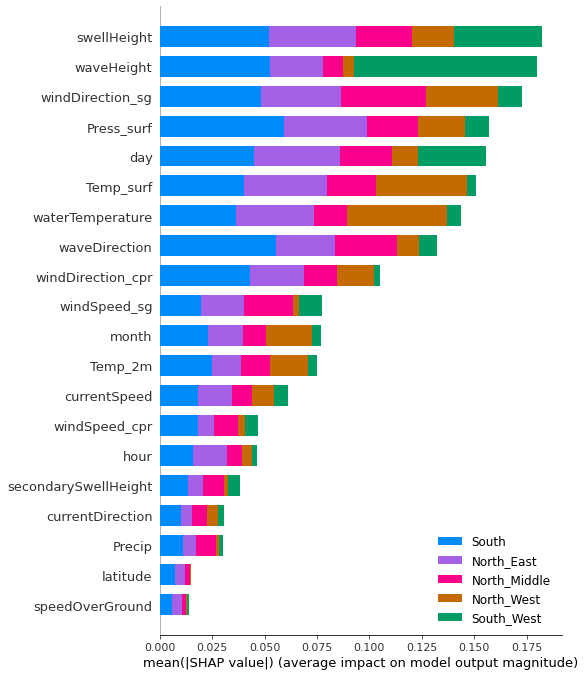

In [71]:
# Visualize SHAP values for each class using summary plot
fig = plt.figure(figsize=(18,14))
shap.summary_plot(shap_values, X_test, class_names=clf_RF.classes_)

# shap.summary_plot(shap_values, X_test, plot_type='bar')

fig.savefig(Output_folder+'/Shap_bar_RFBalnced_5Paths_'+feats+'_'+tempo_res+'_vxsd_'+str(vxsd)+'_sc_'
            +str(scaling_sw)+'_shff_'+str(shuff)+'.png', dpi=500)  


In [72]:
# features_best_shap_NM_NE_shuff0=['Temp_surf', 'windDirection_sg', 'waterTemperature', 'Press_surf', 'day', 'windDirection_cpr', 'Temp_2m',
# 'swellHeight', 'waveHeight', 'currentSpeed', 'windSpeed_cpr', 'windSpeed_sg', 'waveDirection',
# 'secondarySwellHeight', 'Precip', 'hour', 'courseOverGroundTrue', 'currentDirection', 'windSpeed_Onb', 'month']

# features_best_shap_NM_NE_shuff1=['windDirection_sg', 'day', 'Temp_surf', 'swellHeight', 'waterTemperature', 'windSpeed_sg', 'windDirection_cpr',
# 'waveHeight', 'hour', 'waveDirection', 'currentSpeed', 'Precip', 'month',
# 'Temp_2m', 'courseOverGroundTrue', 'secondarySwellHeight', 'currentDirection', 'windSpeed_Onb']

In [73]:
print(feats)
features

Best_Shaps


['latitude',
 'longitude',
 'speedOverGround',
 'courseOverGroundTrue',
 'rateOfTurn',
 'distanceFromDock',
 'distanceToNextDock',
 'accumDistLeg',
 'windSpeed_Onb',
 'windDirection_Onb',
 'windSpeed_cpr',
 'windDirection_cpr',
 'waveHeight',
 'waveDirection',
 'currentSpeed',
 'currentDirection',
 'windSpeed_sg',
 'windDirection_sg',
 'month',
 'day',
 'hour',
 'Temp_2m',
 'Temp_surf',
 'waterTemperature',
 'Snow_depth',
 'Snow_fall',
 'Press_surf',
 'Precip',
 'iceCover',
 'swellHeight',
 'secondarySwellHeight',
 'Bathymetry']

In [74]:
scaling_sw

1

In [75]:
df.shape

(108963, 74)

In [76]:
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,courseOverGroundTrue,speedOverGround,...,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry,windDirectionTrue,pathSelection,Path_7classes,Path_class
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0,160.576217,North_East,North_East,North_East
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0,156.996200,North_East,North_East,North_East
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0,153.420925,North_East,North_East,North_East
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0,149.662333,North_East,North_East,North_East
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0,151.495800,North_East,North_East,North_East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 10:26:52,798.000000,24.000000,59.407173,18.553014,59.407175,18.553018,2.097033,7.591683,153.893617,0.108333,...,0.423437,0.0,-5.820766e-11,100568.015625,0.000100,30.0,203.894667,South,South,South
2022-11-06 10:26:53,790.000000,24.000000,59.407174,18.553015,59.407175,18.553018,1.595700,7.090350,269.344600,0.050000,...,0.423407,0.0,-5.820766e-11,100568.000000,0.000101,30.0,198.793400,South,South,South
2022-11-06 10:26:54,790.750000,24.000000,59.407175,18.553017,59.407175,18.553019,224.830762,230.325437,72.970500,0.112500,...,0.423376,0.0,-5.820766e-11,100567.992188,0.000101,30.0,204.830962,South,South,South


In [77]:
y_test.shape

(21793,)

In [78]:
df.shape

(108963, 74)

In [ ]:
#feats='lat_lon'

#df_y_pred_probs
# 'lat_lon' 	North_East 	North_Middle 	North_West 	South 	South_West
# 0 	0.00 	0.00 	0.00 	1.00 	0.00
# 1 	0.27 	0.02 	0.00 	0.71 	0.00
# 2 	0.00 	0.00 	0.00 	0.91 	0.09
# 3 	0.02 	0.05 	0.00 	0.93 	0.00
# 4 	0.01 	0.00 	0.04 	0.95 	0.00
# ... 	... 	... 	... 	... 	...
# 21790 	0.00 	0.00 	0.44 	0.00 	0.56
# 21791 	0.00 	0.00 	0.00 	0.99 	0.01
# 21792 	0.00 	0.00 	0.00 	1.00 	0.00
# 21793 	0.00 	0.01 	0.08 	0.00 	0.91
# 21794 	0.00 	0.00 	0.47 	0.00 	0.53
####################################################################

#feats='Best_Shaps'

# df_y_pred_probs
# North_East 	North_Middle 	North_West 	South 	South_West
# 0 	0.0 	0.0 	0.0 	1.0 	0.0
# 1 	0.0 	0.0 	0.0 	1.0 	0.0
# 2 	0.0 	0.0 	0.0 	1.0 	0.0
# 3 	0.0 	0.0 	0.0 	1.0 	0.0
# 4 	0.0 	0.0 	0.0 	1.0 	0.0
# ... 	... 	... 	... 	... 	...
# 21790 	0.0 	0.0 	0.0 	0.0 	1.0
# 21791 	0.0 	0.0 	0.0 	0.0 	1.0
# 21792 	0.0 	0.0 	0.0 	0.0 	1.0
# 21793 	0.0 	0.0 	0.0 	0.0 	1.0
# 21794 	0.0 	0.0 	0.0 	0.0 	1.0


#######################################################
#feats='Best_Shaps_noCog_noTime_noLat_lon'
# df_y_pred_probs
# North_East 	North_Middle 	North_West 	South 	South_West
# 0 	0.0 	0.0 	0.0 	1.0 	0.0
# 1 	0.0 	0.0 	0.0 	1.0 	0.0
# 2 	0.0 	0.0 	0.0 	1.0 	0.0
# 3 	0.0 	0.0 	0.0 	1.0 	0.0
# 4 	0.0 	0.0 	0.0 	1.0 	0.0
# ... 	... 	... 	... 	... 	...
# 21790 	0.0 	0.0 	0.0 	0.0 	1.0
# 21791 	0.0 	0.0 	0.0 	0.0 	1.0
# 21792 	0.0 	0.0 	0.0 	0.0 	1.0
# 21793 	0.0 	0.0 	0.0 	0.0 	1.0
# 21794 	0.0 	0.0 	0.0 	0.0 	1.0